In [1]:
import sys; sys.path.append('/home/cb2714/wwa/'); from wwa import *

# Convert data to .csv

In [119]:
hi = decode_times(xr.open_dataset("HI5day_Jul-June_WAF_ERA5_1950_2024.nc", decode_times = False)).hi
hi.assign_coords(time = hi.time.dt.year).rename(time = "year").to_dataframe().to_csv("hi5day_era5.csv")

hi = decode_times(xr.open_dataset("HI5day_Jul-June_WAF_MSWX_1979_2024.nc", decode_times = False)).hi
hi.assign_coords(time = hi.time.dt.year).rename(time = "year").to_dataframe().to_csv("hi5day_mswx.csv")

# Plot of magnitudes

In [111]:
hi = decode_times(xr.open_dataset("hi_era5_ts_daily_waf.nc", decode_times = False)).hi
hi5 = decode_times(xr.open_dataset("HI5day_Jul-June_WAF_ERA5_1950_2024.nc", decode_times = False)).hi

quantiles = hi.sel(time = slice("1990", "2020")).quantile([0.85, 0.9, 0.95, 0.99])


In [37]:
plt.bar(x = hi5.time.dt.year, height = hi5)
plt.ylim(40,None)
[plt.axhline(y, color = "k") for y in hi.sel(time = slice("1990", "2020")).quantile([0.85, 0.9, 0.95, 0.99])]

In [99]:
bins = np.arange(25.5,55.5,1)
mids = np.arange(26,55,1)
counts = hi.sel(time = slice("1990", "2020")).groupby_bins(hi.sel(time = slice("1990", "2020")), bins = bins).count()

In [101]:
plt.bar(mids, counts, color = cm(0))

for i in range(len(quantiles)):
    plt.bar(x = hi5.time.dt.year, height = hi5.where(hi5 >= quantiles[i]), color = cm((1/len(quantiles))*i))

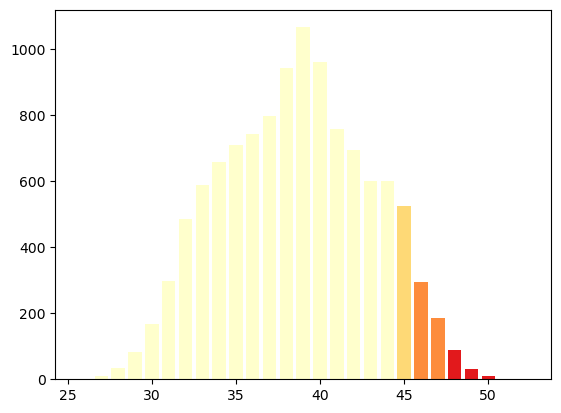

In [118]:
plt.bar(mids, counts, color = cm(0))

for i in range(len(quantiles)):
    plt.bar(mids, counts.where(mids >= quantiles[i].values), color = cm((1/len(quantiles))*i))

In [38]:
cm = matplotlib.cm.get_cmap('YlOrRd')

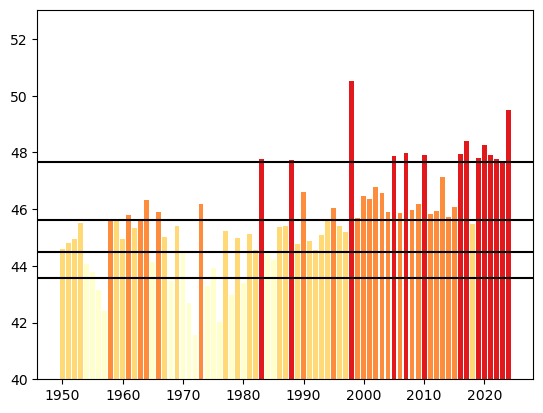

In [52]:
quantiles = hi.sel(time = slice("1990", "2020")).quantile([0.85, 0.9, 0.95, 0.99])

plt.bar(x = hi5.time.dt.year, height = hi5, color = cm(0))
plt.ylim(40,None)

for i in range(len(quantiles)):
    plt.bar(x = hi5.time.dt.year, height = hi5.where(hi5 >= quantiles[i]), color = cm((1/len(quantiles))*i))

[plt.axhline(y, color = "k") for y in quantiles]

In [51]:
xr.ones_like(hi).where(hi >= 41, 0).mean()

<xarray.DataArray 'hi' ()>
array(0.251329, dtype=float32)

In [48]:
quantiles.round(1)


<xarray.DataArray 'hi' (quantile: 4)>
array([43.6, 44.5, 45.6, 47.7])
Coordinates:
  * quantile  (quantile) float64 0.85 0.9 0.95 0.99

# Anomaly plot

In [3]:
hi = decode_times(xr.open_dataset("HI5day_Jul-June_WAF_ERA5_1950_2024.nc", decode_times = False)).hi
anom = hi - hi.sel(time = slice("1990", "2020")).mean()

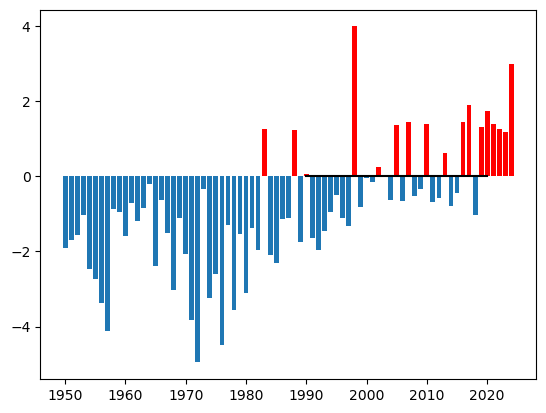

In [29]:
plt.bar(x = anom.time.dt.year, height = anom.where(anom < 0))
plt.bar(x = anom.time.dt.year, height = anom.where(anom > 0), color = "red")
plt.plot([1990,2020], [0,0], color = "k")

# Get Nino3.4 time series

In [2]:
nino34 = xr.open_dataset("../10_misc/detrended_nino34/ersst_nino34_detrended.nc").nino34

In [18]:
nino34_ann = nino34.resample(time = "AS-JUL").mean()
nino34_ann = nino34_ann.assign_coords(time = nino34_ann.time.dt.year+1).rename(time = "year") # label as second half of year
nino34_ann.to_dataframe().to_csv("nino34_ann.csv")

In [21]:
nino34_djf = nino34.rolling(time = 3).mean().groupby("time.month")[2]
nino34_djf = nino34_djf.assign_coords(time = nino34_djf.time.dt.year).rename(time = "year").dropna("year", "any")
nino34_djf.to_dataframe().to_csv("nino34_djf.csv")

In [24]:
hi = decode_times(xr.open_dataset("HI5day_WAF_ERA5_1949_2023.nc", decode_times = False)).HI5day
hi = hi.assign_coords(time = hi.time.dt.year).rename(time = "year")
hi.to_dataframe().to_csv("hi5day.csv")

# Which bit of ERA5 is causing the problem in the heat index?

In [ ]:
tmax = xr.open_dataset("tmax_era5_ts_daily_waf_extended.nc").tmax.sel(time = slice("2023", "2024"))
tdew = xr.open_dataset("tdew_era5_ts_daily_waf_extended.nc").tdew.sel(time = slice("2023", "2024"))
rh = xr.open_dataset("rh_era5_ts_daily_waf_extended.nc").rh.sel(time = slice("2023", "2024"))

In [36]:
tmax, tdew, rh = [ts.assign_coords(time = ts.time.dt.floor("D")) for ts in [tmax, tdew, rh]]

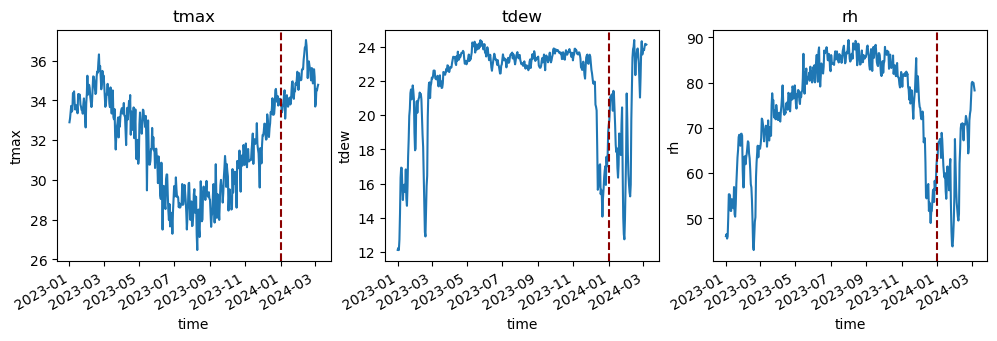

In [37]:
fig, axs = plt.subplots(ncols = 3, figsize = (12,3), dpi = 100)
for i in range(3):
    ax = axs[i]
    ts = [tmax, tdew, rh][i]
    ts.plot(ax = ax)
    ax.axvline(datetime(2024,1,1), color = "darkred", ls = "--")
    ax.set_title(ts.name)

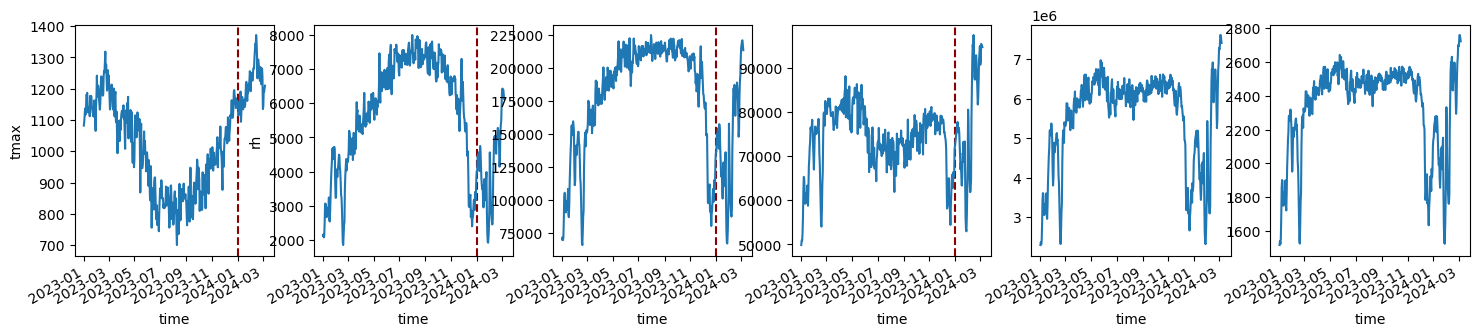

In [41]:
fig, axs = plt.subplots(ncols = 6, figsize = (18,3), dpi = 100)
for i in range(4):
    axs[i].axvline(datetime(2024,1,1), color = "darkred", ls = "--")
    
(tmax**2).plot(ax = axs[0])
(rh**2).plot(ax = axs[1])
(tmax*(rh**2)).plot(ax = axs[2])
(rh*(tmax**2)).plot(ax = axs[3])
((rh**2)*(tmax**2)).plot(ax = axs[4])
(tmax*rh).plot(ax = axs[5])
